In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/My Drive/TFM/

/content/gdrive/My Drive/TFM


In [ ]:
import os

import numpy as np
import pandas as pd
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cufflinks as cf

import seaborn as sns

import glob

#tick data for ETH loading

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/*.csv")))*100,1), '%. There are', len(glob.glob("data/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/*.csv")))*100,1), '%. There are', len(glob.glob("data/*.csv"))-i, "files left",end='', flush=True)

Percentge of files already Loaded: 0.0 %. There are 1 files left

In [ ]:
data1 = data[data.symbol == 'ETHUSD']
del(data)
# timestamp parsing
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%d %H:%M:%S.%f"))

In [ ]:
data1

Unnamed: 0               timestamp  ... homeNotional foreignNotional
0               6753 2019-12-22 00:00:02.857  ...     0.007144        0.906915
1               6754 2019-12-22 00:00:02.857  ...     0.007144        0.906915
2               6755 2019-12-22 00:00:02.857  ...     0.007144        0.906915
3               6756 2019-12-22 00:00:02.857  ...     0.007144        0.906915
4               6757 2019-12-22 00:00:02.857  ...     0.007144        0.906915
...              ...                     ...  ...          ...             ...
53700786      201469 2021-05-23 23:59:26.501  ...     0.382609      806.328700
53700787      201470 2021-05-23 23:59:26.601  ...     0.869565     1832.565000
53700788      201471 2021-05-23 23:59:30.218  ...     0.346861      731.651100
53700789      201472 2021-05-23 23:59:52.239  ...     0.104058      219.230000
53700790      201473 2021-05-23 23:59:52.278  ...     0.104058      219.224800

[53700791 rows x 11 columns]

#Time, Volume, Tick and Dollar bars

In [ ]:

#TIME BARS

Time_bars = data1.groupby(pd.Grouper(key="timestamp", freq="30min")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })


Time_bars.columns = ['open','high','low','close','size','timestamp']


Time_bars



#VOLUME BARS

n = 500000 ;

def bar(xs, y): return np.int64(xs / y) * y

#Volume_bars = data.groupby(bar(np.cumsum(data['size']), n)).agg({'price': 'ohlc', 'size': 'sum'})
Volume_bars = data1.groupby(bar(np.cumsum(data1['size']), n)).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})

Volume_bars.columns = ['open','high','low','close','size','timestamp']


Volume_bars



#TICK BARS

#n = number of ticks

n = 5000 ;

def bar(xs, y): return np.int64(xs / y) * y

Tick_bars = data1.groupby(bar(np.arange(len(data1)), n)).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})


Tick_bars.columns = ['open','high','low','close','size','timestamp']


Tick_bars


#DOLLAR BARS

n = 28000000 ;


Dollar_bars = data1.groupby(bar(np.cumsum(data1['foreignNotional']), n)).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})


Dollar_bars.columns = ['open','high','low','close','size','timestamp']


Dollar_bars

open     high  ...      size               timestamp
0              126.95   129.40  ...  30577043 2019-12-22 00:00:02.857
28000000       129.40   131.45  ...  30098282 2019-12-22 07:57:20.339
56000000       129.45   132.55  ...  29664292 2019-12-22 12:56:28.806
84000000       132.55   133.25  ...  28480847 2019-12-22 18:47:10.852
112000000      132.85   135.30  ...  27472002 2019-12-23 00:05:04.415
...               ...      ...  ...       ...                     ...
238196000000  1915.75  2098.20  ...    420080 2021-05-23 18:58:05.838
238224000000  2090.00  2144.80  ...    390774 2021-05-23 20:47:46.781
238252000000  2140.00  2157.30  ...    387063 2021-05-23 21:20:53.558
238280000000  2098.80  2106.00  ...    397663 2021-05-23 22:35:40.039
238308000000  2090.00  2133.50  ...    136990 2021-05-23 23:13:20.879

[8512 rows x 6 columns]

#Experiment different types of sampling on market tick data (CHAPTER 3. DATA ACQUISITION)

(737389.0508711905,
 737959.9324324785,
 -0.05500000000000001,
 0.05500000000000001)

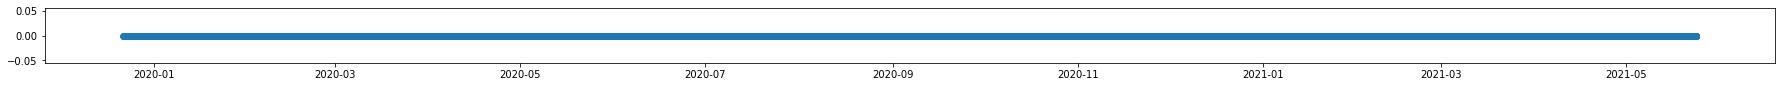

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


#TICK BARS PLOT

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=Tick_bars['timestamp'],
                open=Tick_bars['open'],
                high=Tick_bars['high'],
                low=Tick_bars['low'],
                close=Tick_bars['close'])])

#fig.add_trace(px.scatter(Tick_bars, x='timestamp', y='zeros'))

fig.update_layout(xaxis_rangeslider_visible=False, title = "Tick Bars")
fig.update_layout(
    title="Tick Bars",
    title_x=0.5
)

fig.show()

x = Tick_bars['timestamp']
y = np.full((len(Tick_bars)), 0, dtype = int)

plt.figure(figsize=(31,1))

plt.plot(x, y , 'o')


plt.axis()
#plt.axis('off')


(737389.0524336731,
 737959.8996203432,
 -0.05500000000000001,
 0.05500000000000001)

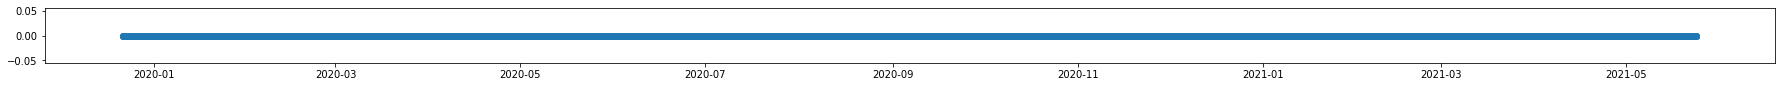

In [ ]:

#VOLUME BARS PLOT

fig = go.Figure(data=[go.Candlestick(x=Volume_bars['timestamp'],
                open=Volume_bars['open'],
                high=Volume_bars['high'],
                low=Volume_bars['low'],
                close=Volume_bars['close'])])


#fig.add_trace(px.scatter(Tick_bars, x='timestamp', y='zeros'))

fig.update_layout(xaxis_rangeslider_visible=False)

fig.update_layout(
    title="Volume Bars",
    title_x=0.5
)

fig.show()

x = Volume_bars['timestamp']
y = np.full((len(Volume_bars)), 0, dtype = int)

plt.figure(figsize=(31,1))

plt.plot(x, y , 'o')


plt.axis()
#plt.axis('off')


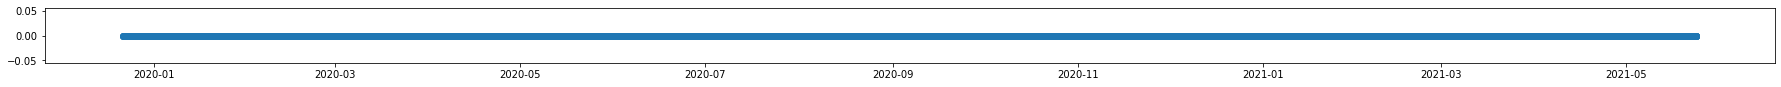

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


#TIME BARS PLOT


#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=Time_bars['timestamp'],
                open=Time_bars['open'],
                high=Time_bars['high'],
                low=Time_bars['low'],
                close=Time_bars['close'])])

#fig.add_trace(px.scatter(Tick_bars, x='timestamp', y='zeros'))

fig.update_layout(xaxis_rangeslider_visible=False)

fig.update_layout(
    title="Time Bars",
    title_x=0.5
)

fig.show()


x = Time_bars['timestamp']
y = np.full((len(Time_bars)), 0, dtype = int)

plt.figure(figsize=(31,1))

plt.plot(x, y , 'o')


(737389.0516545823,
 737959.9159812512,
 -0.05500000000000001,
 0.05500000000000001)

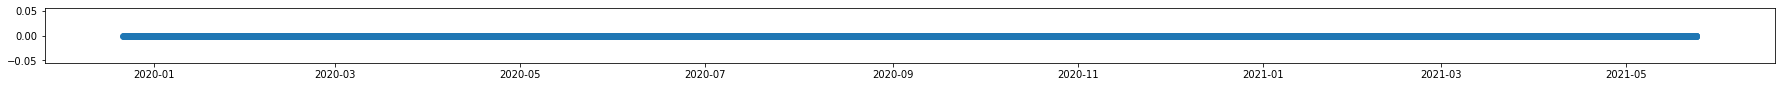

In [ ]:

#DOLLAR BARS PLOT

fig = go.Figure(data=[go.Candlestick(x=Dollar_bars['timestamp'],
                open=Dollar_bars['open'],
                high=Dollar_bars['high'],
                low=Dollar_bars['low'],
                close=Dollar_bars['close'])])


#fig.add_trace(px.scatter(Tick_bars, x='timestamp', y='zeros'))

fig.update_layout(xaxis_rangeslider_visible=False)

fig.update_layout(
    title="Dollar Bars",
    title_x=0.5
)

fig.show()

x = Dollar_bars['timestamp']
y = np.full((len(Dollar_bars)), 0, dtype = int)

plt.figure(figsize=(31,1))

plt.plot(x, y , 'o')


plt.axis()
#plt.axis('off')
